In [3]:
import torch
import torch.nn as nn

from torch.optim import Adam # Faster than SGD
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
### Troll2 is great
### Gymkata is great
## Troll2 is great Gymkata

inputs = torch.tensor([[1., 0., 0., 0.], 
                       [0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.]])

labels = torch.tensor([[0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.],
                       [0., 1., 0., 0.]])
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

## Basic Word Embedding

In [15]:
class WordEmbeddingFromScratch(L.LightningModule):
    def __init__(self):
        super().__init__()
        
        min_value = -0.5
        max_value = 0.5
        
        self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        
        self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        
        self.loss = nn.CrossEntropyLoss()
        

    def forward(self, input):
        input = input[0]
        
        inputs_to_top_hidden = ((input[0] * self.input1_w1) +
                                (input[1] * self.input2_w1) +
                                (input[2] * self.input3_w1) +
                                (input[3] * self.input4_w1))
        inputs_to_bottom_hidden = ((input[0] * self.input1_w2) +
                                   (input[1] * self.input2_w2) +
                                   (input[2] * self.input3_w2) +
                                   (input[3] * self.input4_w2))
        output1 = ((inputs_to_top_hidden * self.output1_w1) +
                  (inputs_to_bottom_hidden * self.output1_w2))
        output2 = ((inputs_to_top_hidden * self.output2_w1) +
                  (inputs_to_bottom_hidden * self.output2_w2))
        output3 = ((inputs_to_top_hidden * self.output3_w1) +
                  (inputs_to_bottom_hidden * self.output3_w2))
        output4 = ((inputs_to_top_hidden * self.output4_w1) +
                  (inputs_to_bottom_hidden * self.output4_w2))
        output_presoftmax = torch.stack([output1, output2, output3, output4])
        return(output_presoftmax)

    def configure_optimizers(self):
        return(Adam(self.parameters(),lr=0.1))
    
    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i,label_i[0])
        return loss    

In [16]:
modelFromScratch = WordEmbeddingFromScratch()
print(f"Before optimization, the parameters are...")
for name, param in modelFromScratch.named_parameters():
    print(f"{name}: {param.data}")

Before optimization, the parameters are...
input1_w1: 0.48927217721939087
input1_w2: -0.25236600637435913
input2_w1: 0.45014870166778564
input2_w2: 0.20543819665908813
input3_w1: -0.24032217264175415
input3_w2: 0.10505884885787964
input4_w1: 0.19507265090942383
input4_w2: -0.3235602378845215
output1_w1: 0.13932788372039795
output1_w2: -0.1520957350730896
output2_w1: -0.19558990001678467
output2_w2: 0.13494926691055298
output3_w1: -0.19221091270446777
output3_w2: -0.051127612590789795
output4_w1: -0.2785267233848572
output4_w2: -0.32625412940979004


In [22]:
data = {
    "w1": [modelFromScratch.input1_w1.item(), 
           modelFromScratch.input2_w1.item(), 
           modelFromScratch.input3_w1.item(), 
           modelFromScratch.input4_w1.item()],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(), 
           modelFromScratch.input3_w2.item(), 
           modelFromScratch.input4_w2.item()],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]       
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.489272,-0.252366,Troll2,input1
1,0.450149,0.205438,is,input2
2,-0.240322,0.105059,great,input3
3,0.195073,-0.323560,Gymkata,input4


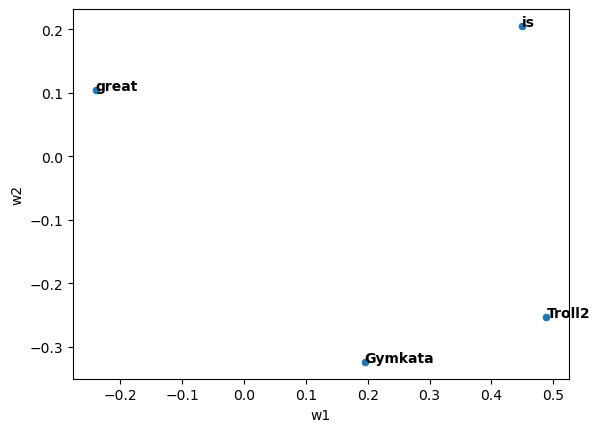

In [23]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.show()

In [26]:
trainer = L.Trainer(max_epochs=500)
trainer.fit(modelFromScratch, train_dataloaders = dataloader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
/opt/anaconda3/envs/machine_learning/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/opt/anaconda3/envs/machine_learning/lib/python3.13/site-packages/lightning/pytorch/lo

Epoch 499: 100%|██████████| 4/4 [00:00<00:00, 258.28it/s, v_num=13]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 499: 100%|██████████| 4/4 [00:00<00:00, 176.97it/s, v_num=13]


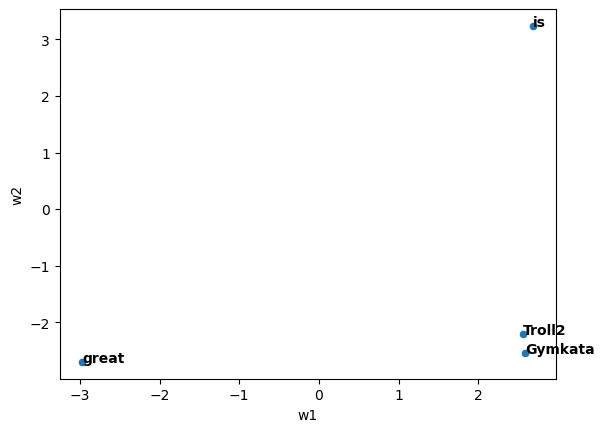

In [27]:
data = {
    "w1": [modelFromScratch.input1_w1.item(), 
           modelFromScratch.input2_w1.item(), 
           modelFromScratch.input3_w1.item(), 
           modelFromScratch.input4_w1.item()],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(), 
           modelFromScratch.input3_w2.item(), 
           modelFromScratch.input4_w2.item()],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]       
}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.show()

In [28]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(modelFromScratch(torch.tensor([[1., 0., 0., 0.]]))), decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


## Simpler Word Embedding

In [ ]:
class WordEmbeddingWithLinear(L.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.input_to_hidden = nn.Linear(in_features=4,out_features=2,bias=False)
        self.hidden_to_output = nn.Linear(in_features=2,out_features=4,bias=False)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        hidden = self.input_to_hidden(input[0])
        output_values = self.hidden_to_output(hidden)
        return(output_values)

    def configure_optimizers(self):
        return(Adam(self.parameters(),lr=0.1))
    
    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i,label_i)
        return loss    

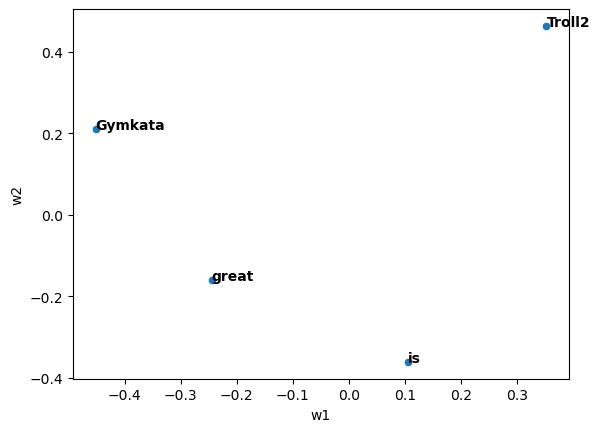

In [30]:
modelLinear = WordEmbeddingWithLinear()
data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]       
}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.show()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
/opt/anaconda3/envs/machine_learning/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/opt/anac

Epoch 499: 100%|██████████| 4/4 [00:00<00:00, 521.52it/s, v_num=14]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 499: 100%|██████████| 4/4 [00:00<00:00, 405.93it/s, v_num=14]


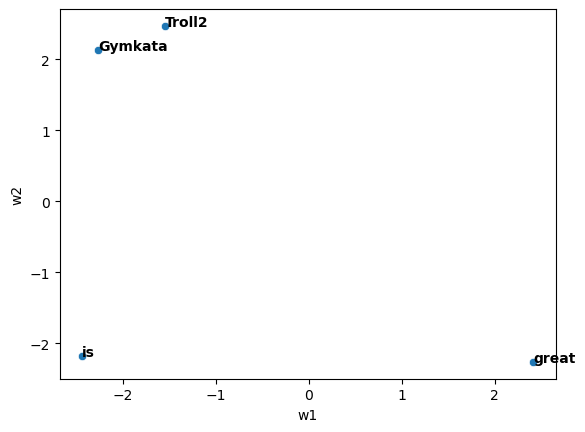

In [31]:
trainer = L.Trainer(max_epochs=500)
trainer.fit(modelLinear, train_dataloaders = dataloader)
data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]       
}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', 
         size='medium',
         color='black',
         weight='semibold')
plt.show()